I want to use this notbook to explore California-wide health insurance rates so that I may compare it to what I am seeing in the data for the communities around the Salton Sea. 

In [3]:
import pandas as pd

In [4]:
import geopandas as gpd

In [6]:
tracts=gpd.read_file('data/geojson_data/tl_rd22_06_tract.shp')
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,029,004402,06029004402,44.02,Census Tract 44.02,G5020,S,1865739,0,+35.5917343,-119.3337642,"POLYGON ((-119.33828 35.58143, -119.33827 35.5..."
1,06,047,000802,06047000802,8.02,Census Tract 8.02,G5020,S,2321653,0,+37.3433591,-120.5854604,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,06,085,501402,06085501402,5014.02,Census Tract 5014.02,G5020,S,522620,0,+37.3453341,-121.8665169,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,06,005,000102,06005000102,1.02,Census Tract 1.02,G5020,S,456204155,7940832,+38.5496993,-120.2509786,"POLYGON ((-120.61016 38.41560, -120.61000 38.4..."
4,06,029,004901,06029004901,49.01,Census Tract 49.01,G5020,S,1459379,0,+35.7837173,-119.2462266,"POLYGON ((-119.25262 35.79043, -119.25259 35.7..."


<AxesSubplot: >

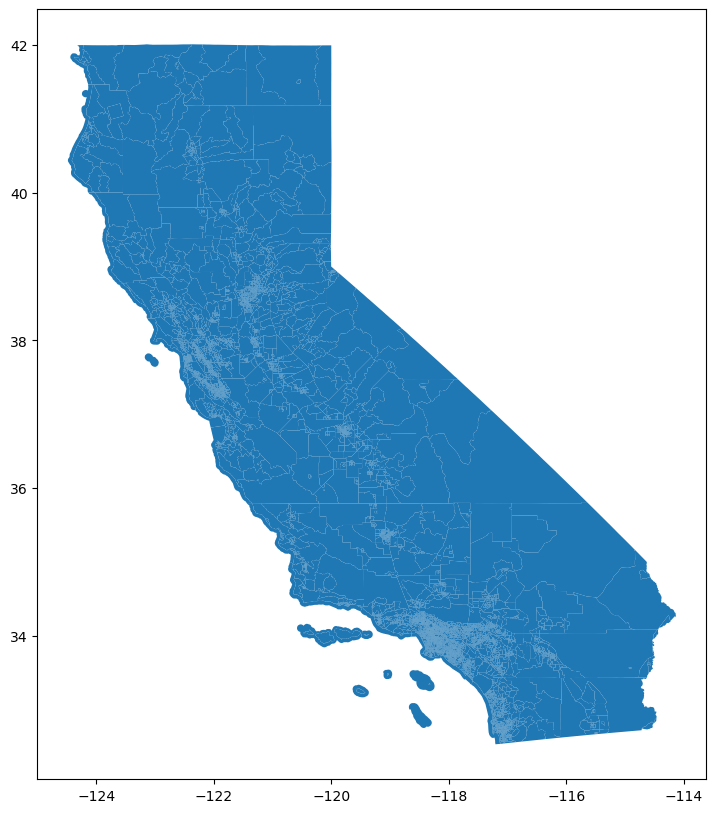

In [7]:
tracts.plot(figsize=(12,10))

In [8]:
df=pd.read_csv('data/supplement/health_insurance data for all tracts.csv')

In [9]:
df.sample()

,File identification,State Postal Abbreviation,Summary Level,Geographic Component,Logical Record Number,US,Census Region,Census Division,State (Census Code),State (FIPS Code),...,% Population 25 to 34: with Health Insurance Coverage: Private Health Insurance,% Population 35 to 64: No Health Insurance Coverage,% Population 35 to 64: with Health Insurance Coverage,% Population 35 to 64: with Health Insurance Coverage: Public Health Coverage,% Population 35 to 64: with Health Insurance Coverage: Private Health Insurance,% Population 65 or Older: No Health Insurance Coverage,% Population 65 or Older: with Health Insurance Coverage,% Population 65 or Older: with Health Insurance Coverage: Public Health Coverage,% Population 65 or Older: with Health Insurance Coverage: Private Health Insurance,Total Population
45494,ACSSF,ne,140,0,3324,NaN,NaN,NaN,NaN,31,...,92.0,0.0,100.0,7.55,92.45,0.0,100.0,89.67,59.39,1552


In [10]:
df = df.dropna(axis=1,how="all")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85395 entries, 0 to 85394
Data columns (total 69 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   File identification                                                                 85395 non-null  object 
 1   State Postal Abbreviation                                                           85395 non-null  object 
 2   Summary Level                                                                       85395 non-null  int64  
 3   Geographic Component                                                                85395 non-null  int64  
 4   Logical Record Number                                                               85395 non-null  int64  
 5   State (FIPS Code)                                                                   85395 non-n

In [16]:
df['% Total: No Health Insurance Coverage'].mean()

8.866457335861577

In [17]:
df['% Total: No Health Insurance Coverage'].median()

6.85

In [19]:
columns_to_keep = ['FIPS',
                   '% Total: No Health Insurance Coverage',
                   '% Total: with Health Insurance Coverage']
df2 = df[columns_to_keep]

<AxesSubplot: ylabel='Frequency'>

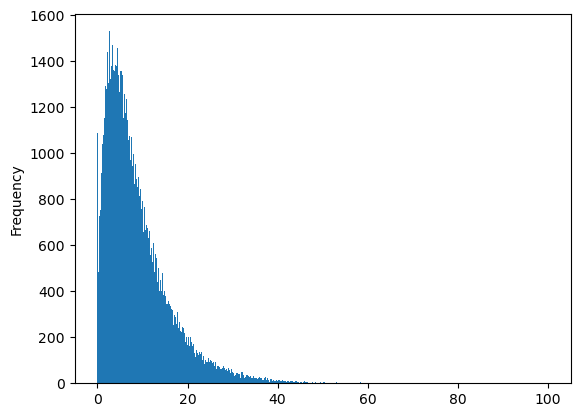

In [22]:
df2['% Total: No Health Insurance Coverage'].plot.hist(bins=500
                                                      )

<AxesSubplot: xlabel='% Total: No Health Insurance Coverage', ylabel='% Total: with Health Insurance Coverage'>

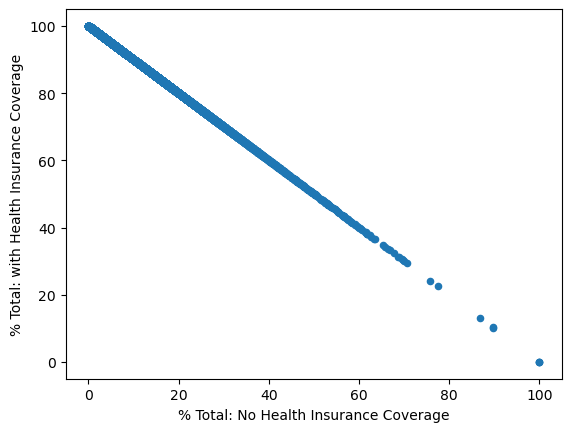

In [23]:
df2.plot.scatter(x='% Total: No Health Insurance Coverage',y='% Total: with Health Insurance Coverage')